In [2]:
%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn
import collections
import math
import statistics
import requests
import io

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
url1="https://raw.githubusercontent.com/Icchi-Koza/seminar/master/Python%20in%20VScode/Kahle%20and%20Stultz/figure3.csv"
url2="https://raw.githubusercontent.com/Icchi-Koza/seminar/master/Python%20in%20VScode/Kahle%20and%20Stultz/figure3_2.csv"
dat1=pd.read_csv(url1,encoding='cp932')
dat2=pd.read_csv(url2,encoding='cp932')

In [5]:
dat1.head(4)

,日経会社コード,企業名称,決算期,決算種別,連結基準,<貸借対照表（資産）>資産合計(百万円),<貸借対照表（資産）>固定資産／非流動資産(百万円),<貸借対照表（資産）>有形固定資産(百万円),<貸借対照表（資産）>償却対象有形固定資産(百万円),<貸借対照表（資産）>現金・預金／現金及び現金同等物(百万円),<貸借対照表（資産）>棚卸資産(百万円),<貸借対照表（資産）>その他棚卸資産(百万円)
0,1,極洋,1984/10,10,1,93094.0,24898.0,10828.0,9692.0,16300.0,19279.0,NaN
1,1,極洋,1985/10,10,1,82267.0,21558.0,7033.0,5986.0,14433.0,17570.0,NaN
2,1,極洋,1986/10,10,1,82394.0,20038.0,7418.0,6643.0,13787.0,17172.0,NaN
3,1,極洋,1987/10,10,1,85497.0,18317.0,6835.0,6144.0,13887.0,20627.0,NaN


In [6]:
list1=[1, 2, 5, 6, 7, 9, 10]
col1=dat1.columns.tolist()
col2=[]
for i in list1:
  col2.append(col1[i])
dat1=dat1.loc[:,col2]
dat1.sample(5)

,企業名称,決算期,<貸借対照表（資産）>資産合計(百万円),<貸借対照表（資産）>固定資産／非流動資産(百万円),<貸借対照表（資産）>有形固定資産(百万円),<貸借対照表（資産）>現金・預金／現金及び現金同等物(百万円),<貸借対照表（資産）>棚卸資産(百万円)
41961,大黒天物産,2006/05,11922.0,8487.0,6174.0,1721.0,1079.0
30795,国際紙パルプ商事,2020/03,189317.0,52771.0,27671.0,7786.0,19764.0
32768,大光,2015/05,18634.0,7503.0,4880.0,1365.0,3660.0
26390,ユニオンツール,2016/12,52851.0,28076.0,20658.0,7669.0,7423.0
18487,三菱ロジスネクスト,2000/03,41456.0,20104.0,15275.0,2721.0,3755.0


In [7]:
list2=[1,2,5,6,7,8]
col3=dat2.columns.tolist()
col4=[]
for i in list2:
          col4.append(col3[i])
dat2=dat2.loc[:,col4]

In [8]:
dat1.columns=['Name','FY','A(¥M)','FA(¥M)','PP&E(¥M)','Cash(¥M)','Inventory1(¥M)']
def f(a):
  return(a[:4])
dat1['FY']=dat1['FY'].apply(f)
dat2.columns=['Name','FY','M&FG(¥M)','Semi-FG&WIP(¥M)','Raw materials&P/M s(¥M)','REFS(¥M)']
dat2['FY']=dat2['FY'].apply(f)
dat3=dat1.set_index(['Name','FY'])
dat4=dat2.set_index(['Name','FY'])

In [9]:
dat3.sample(5)

,,A(¥M),FA(¥M),PP&E(¥M),Cash(¥M),Inventory1(¥M)
Name,FY,,,,,
バリューコマース,2002,1157.0,308.0,108.0,635.0,31.0
アークランドサカモト,1998,44606.0,26899.0,19770.0,3747.0,9420.0
ラウンドワン,2009,216059.0,187015.0,178133.0,21525.0,1058.0
ドトール・日レスホールディング,2014,109788.0,66225.0,36731.0,31950.0,2378.0
岡部,2001,62061.0,25461.0,17484.0,10436.0,4905.0


In [10]:
dat5=dat3.groupby('FY').sum()
dat5['FA/A']=dat5['FA(¥M)']/dat5['A(¥M)']
dat5['Cash/A']=dat5['Cash(¥M)']/dat5['A(¥M)']
dat5['Inventory1/A']=dat5['Inventory1(¥M)']/dat5['A(¥M)']
list3=list(range(1975,2021))

dat6=dat4.groupby('FY').sum()
dat6['Inventory2(¥M)']=dat6['M&FG(¥M)']+dat6['Semi-FG&WIP(¥M)']+dat6['REFS(¥M)']
dat7=pd.merge(dat5,dat6,how='outer',left_index=True,right_index=True)
dat7['Inventory2/A']=dat7['Inventory2(¥M)']/dat7['A(¥M)']
dat7['Inventory2/A']=dat7['Inventory2/A'].replace(0,np.nan)

In [13]:
dat7

,A(¥M),FA(¥M),PP&E(¥M),Cash(¥M),Inventory1(¥M),FA/A,Cash/A,Inventory1/A,M&FG(¥M),Semi-FG&WIP(¥M),Raw materials&P/M s(¥M),REFS(¥M),Inventory2(¥M),Inventory2/A
FY,,,,,,,,,,,,,,
1975,1.521948e+07,4680797.0,1829207.0,1735773.0,2581765.0,0.307553,0.114049,0.169636,0.0,0.0,0.0,0.0,0.0,NaN
1976,1.660158e+07,5219837.0,1899936.0,2008755.0,2467851.0,0.314418,0.120998,0.148652,0.0,0.0,0.0,0.0,0.0,NaN
1977,2.550462e+07,7657315.0,2427064.0,2816729.0,3470026.0,0.300232,0.110440,0.136055,0.0,0.0,0.0,0.0,0.0,NaN
1978,3.492452e+07,10614815.0,4247792.0,3942625.0,5266003.0,0.303936,0.112890,0.150782,0.0,0.0,0.0,0.0,0.0,NaN
1979,3.756321e+07,11448017.0,4727137.0,4129880.0,5580438.0,0.304767,0.109945,0.148561,0.0,0.0,0.0,0.0,0.0,NaN
1980,4.482891e+07,12597639.0,5297052.0,4762934.0,6843092.0,0.281016,0.106247,0.152649,0.0,0.0,0.0,0.0,0.0,NaN
1981,4.906292e+07,14566516.0,6557941.0,5346002.0,8017494.0,0.296895,0.108962,0.163412,0.0,0.0,0.0,0.0,0.0,NaN
1982,5.597851e+07,17097619.0,7894455.0,6128228.0,9308095.0,0.305432,0.109475,0.166280,0.0,0.0,0.0,0.0,0.0,NaN
1983,5.912129e+07,19211716.0,9026494.0,6470286.0,9310849.0,0.324954,0.109441,0.157487,0.0,0.0,0.0,0.0,0.0,NaN


* Refer [here](https://kentaro-wada.com/uscpa-8-inventory/) on the def. of Inventory2

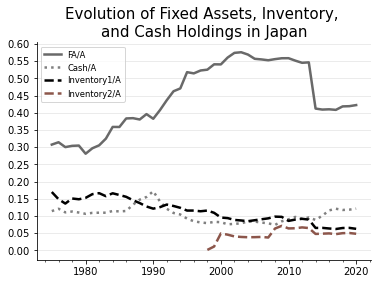

In [8]:
%matplotlib inline
Figure, ax=plt.subplots()
ax.set_title('Evolution of Fixed Assets, Inventory, \nand Cash Holdings in Japan', fontsize=15.0, loc='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6])
minor_locater=AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locater)
ax.grid(axis="y", alpha=0.3)
ax.plot(list3,dat7['FA/A'],c='dimgrey',label='FA/A',ls='-',lw=2.5)
ax.plot(list3,dat7['Cash/A'],c='grey',label='Cash/A',ls=':',lw=2.5)
ax.plot(list3,dat7['Inventory1/A'],c='k',label='Inventory1/A',ls='--',lw=2.5)
ax.plot(list3,dat7['Inventory2/A'],c='tab:brown',label='Inventory2/A',ls='--',lw=2.5)
ax.legend(fontsize='small')
plt.show()